,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


DataFrame exported to 'export_main_returns.csv.csv'


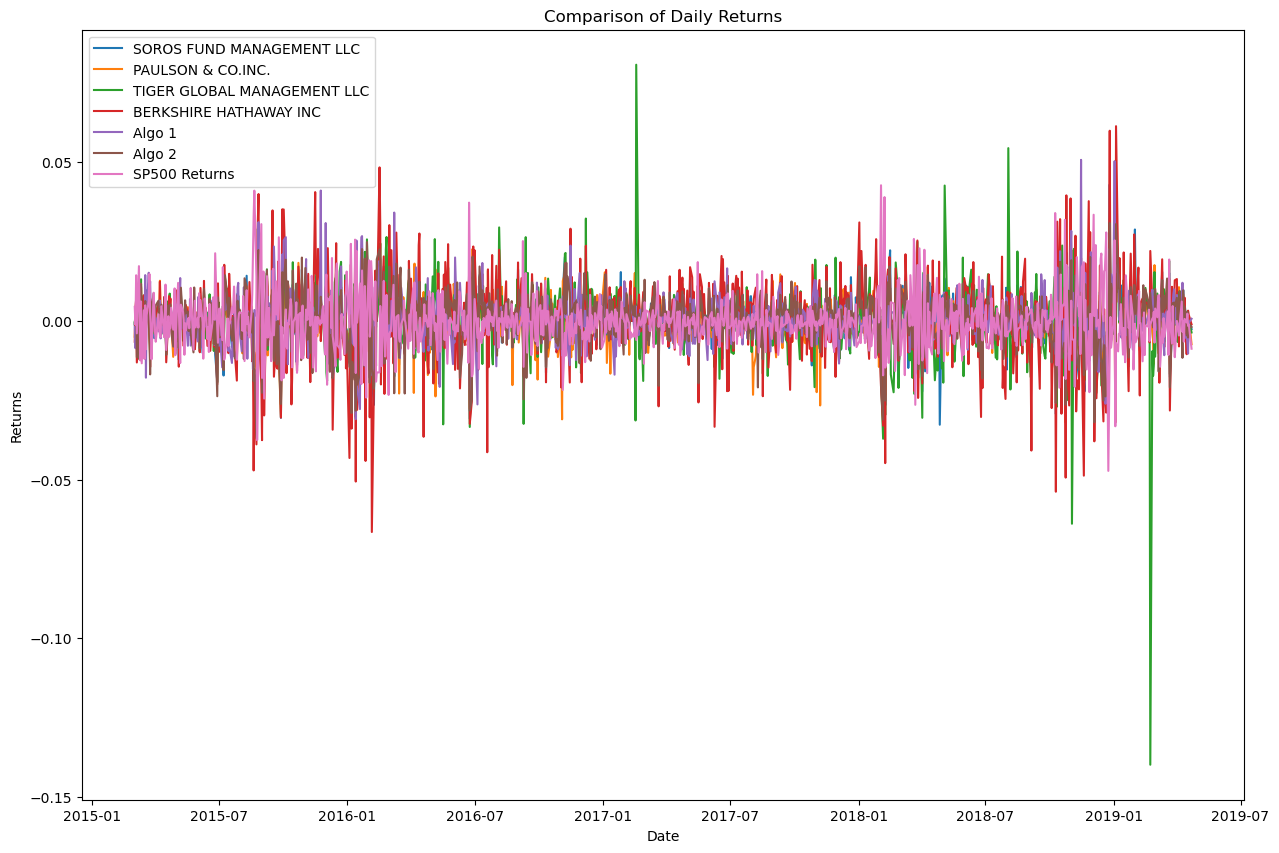

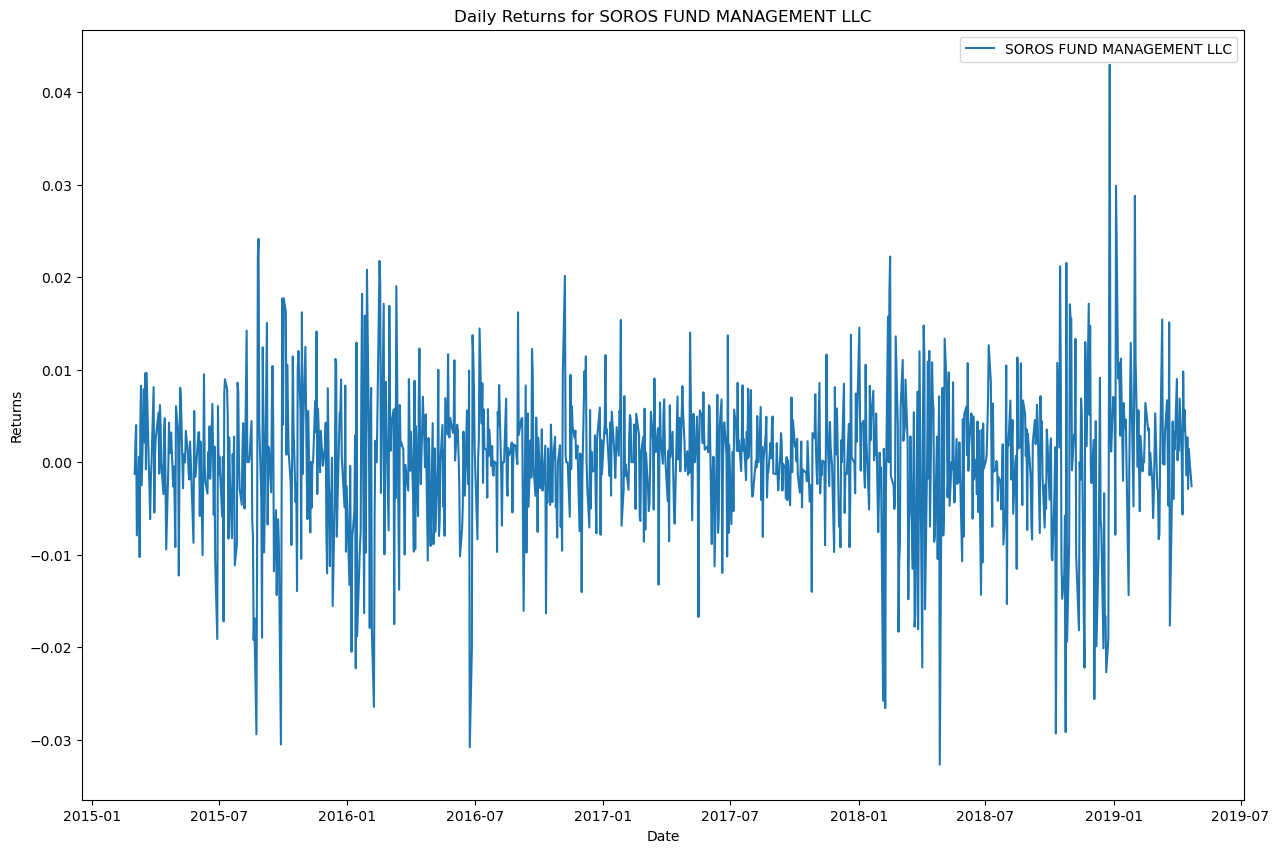

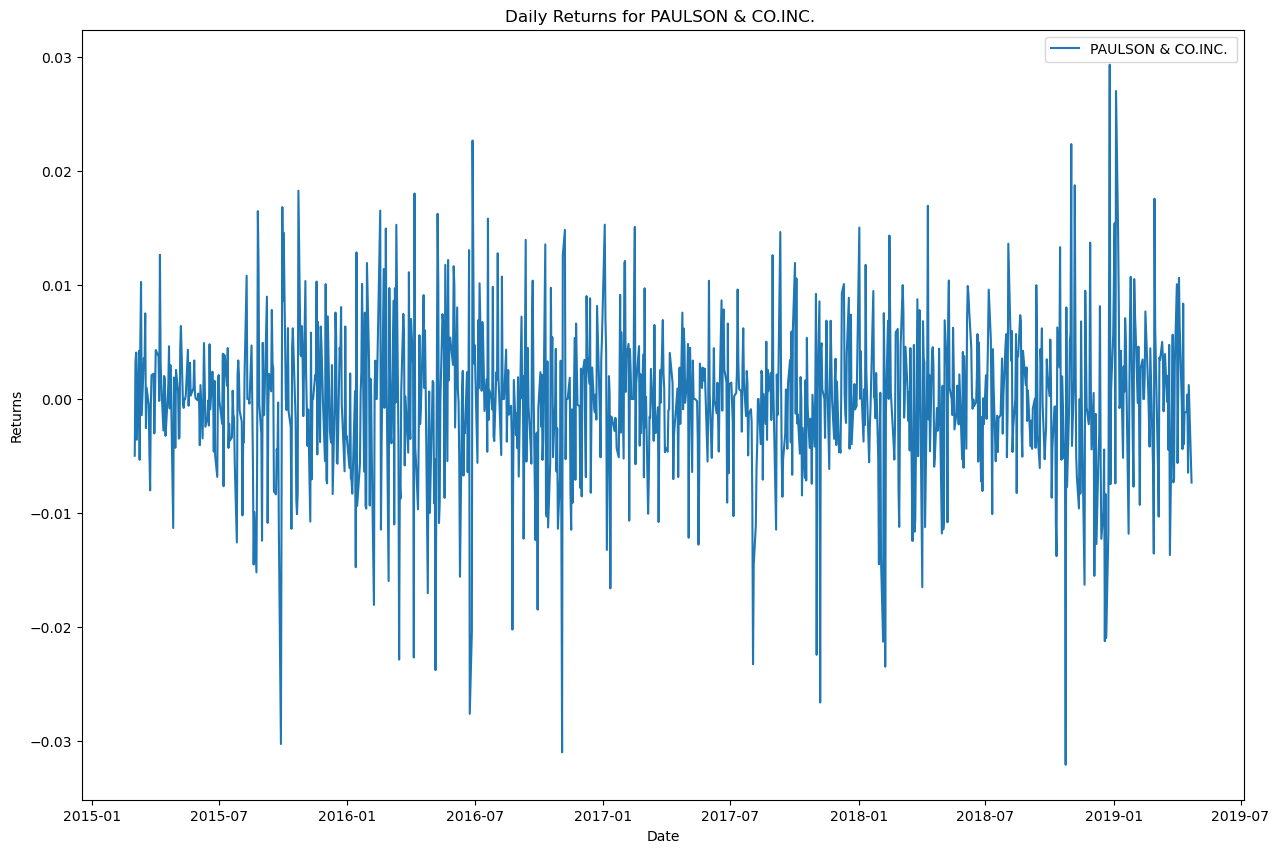

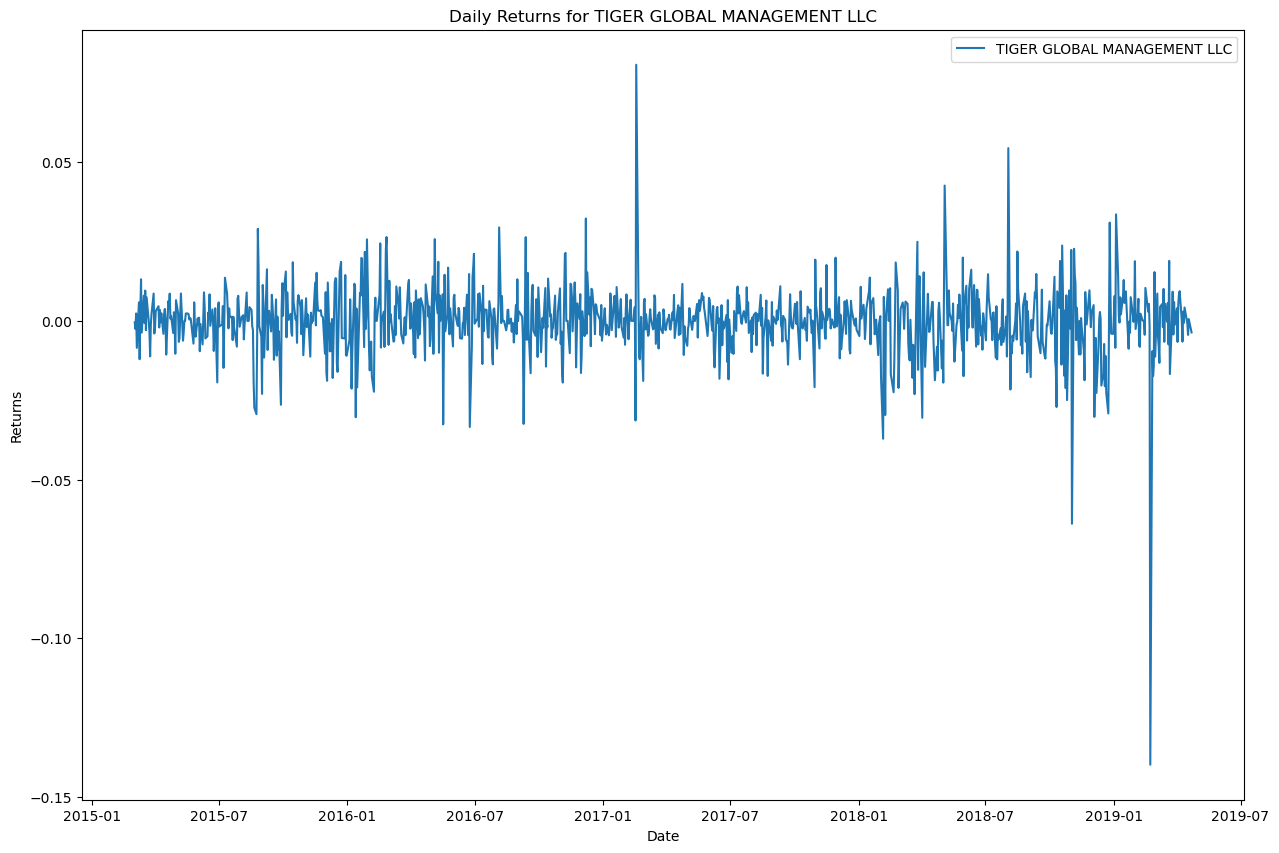

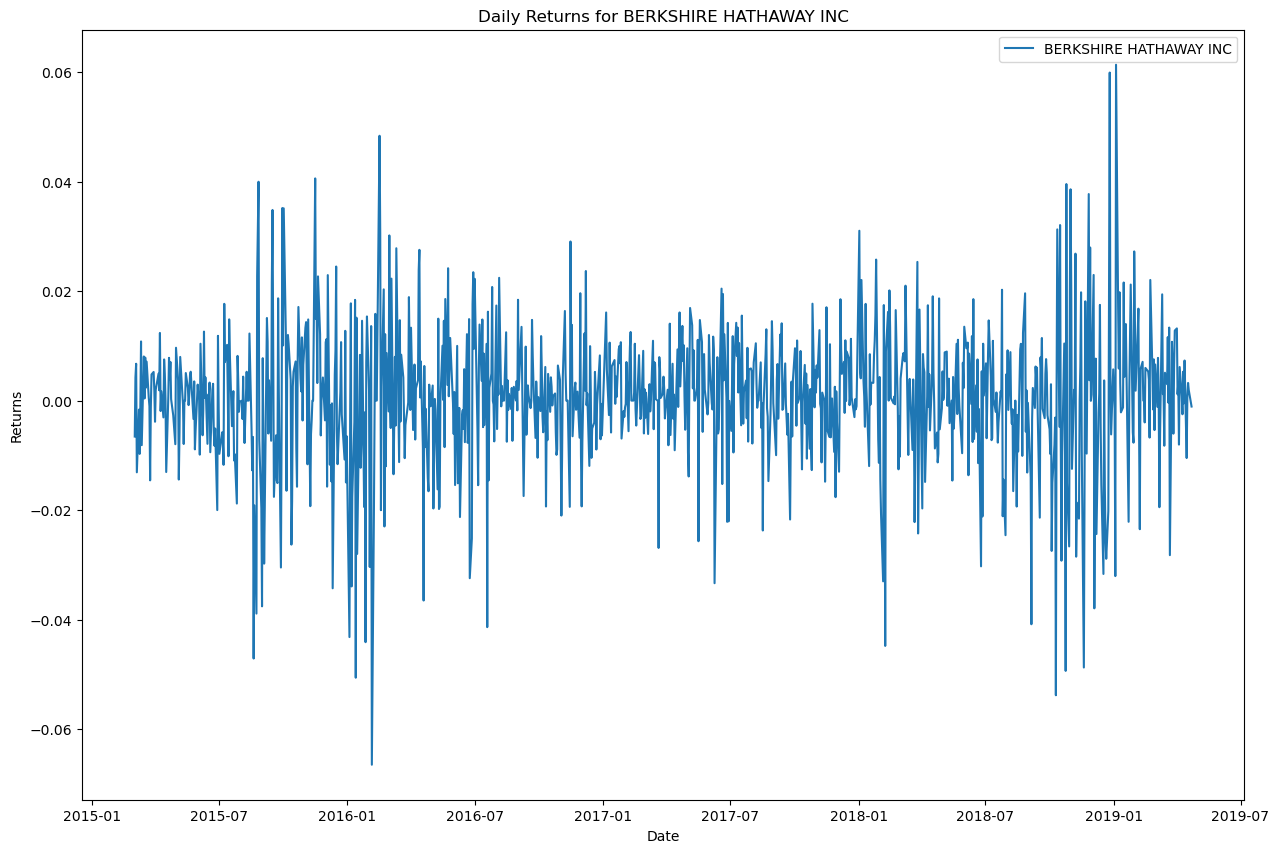

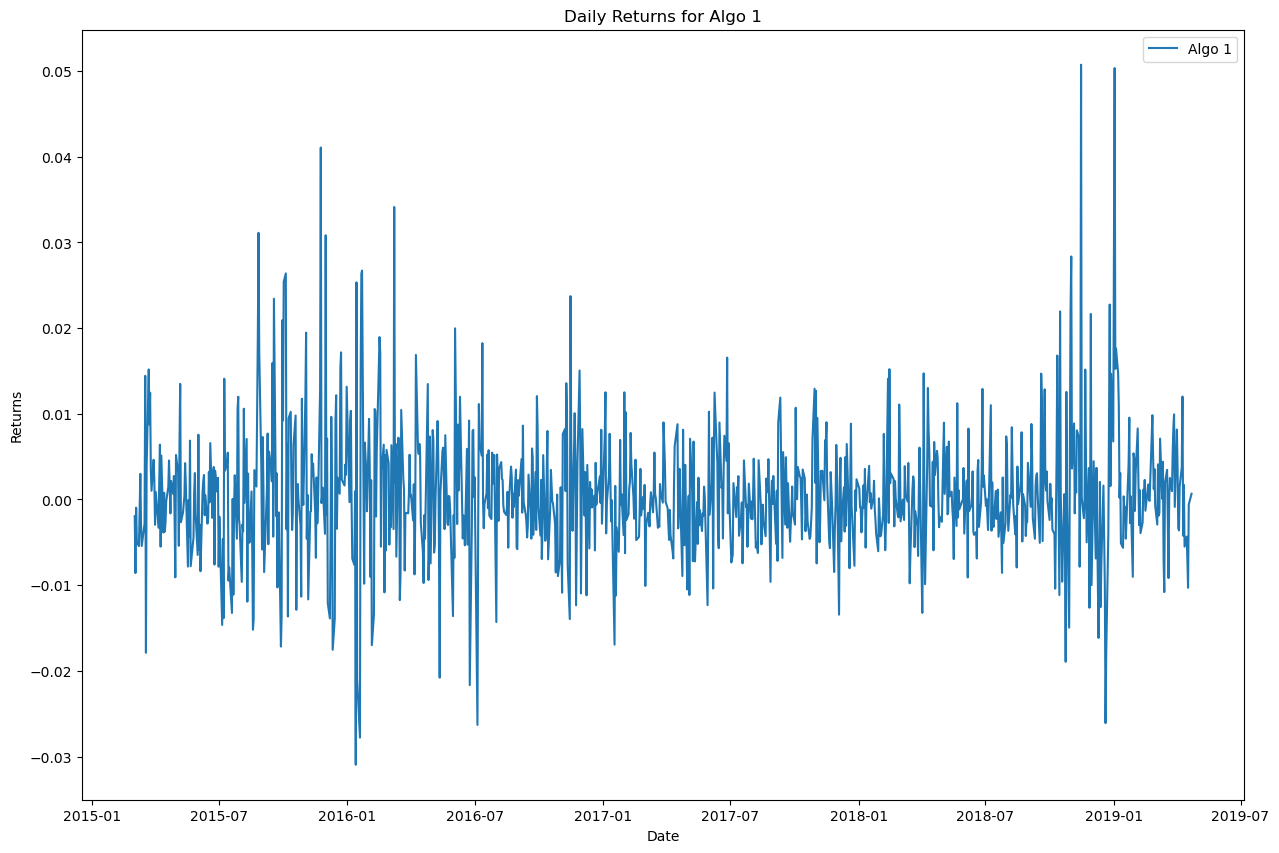

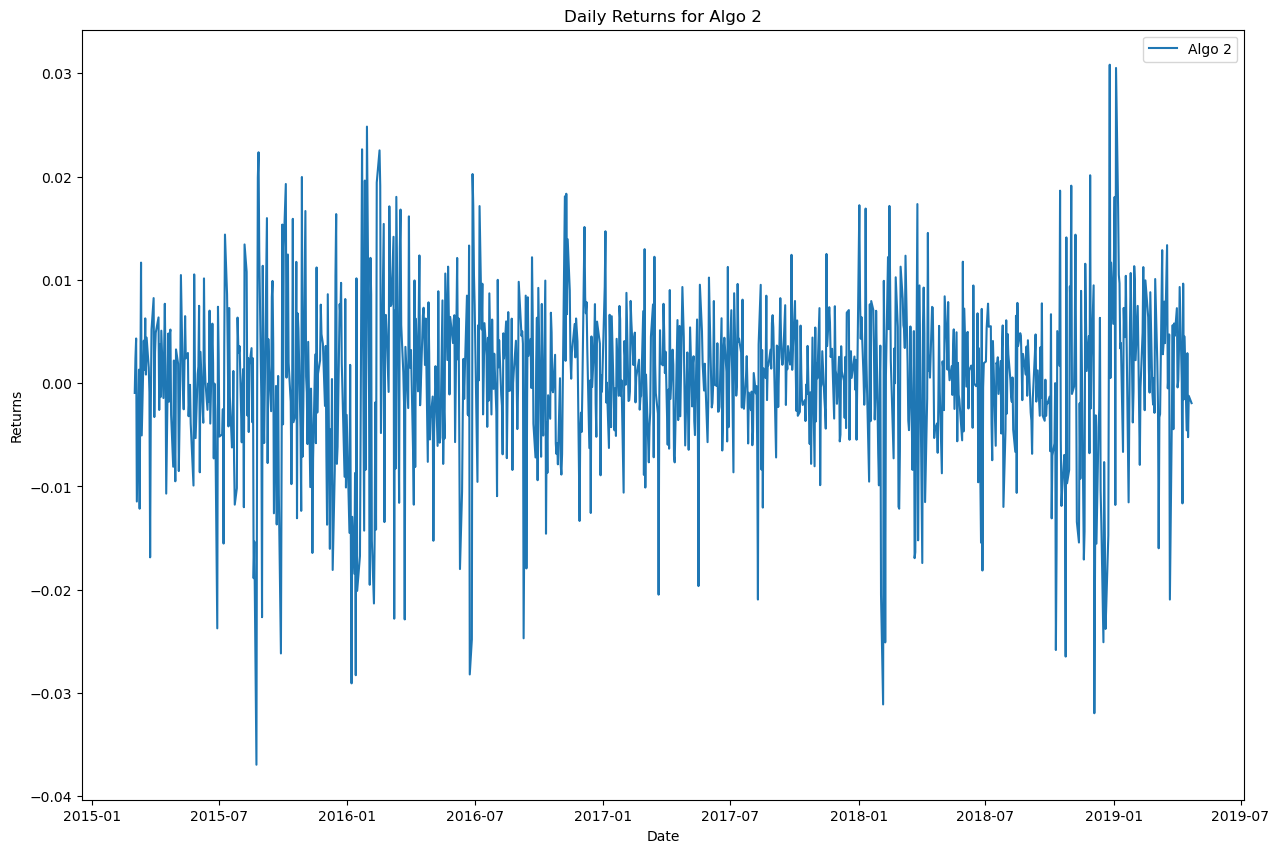

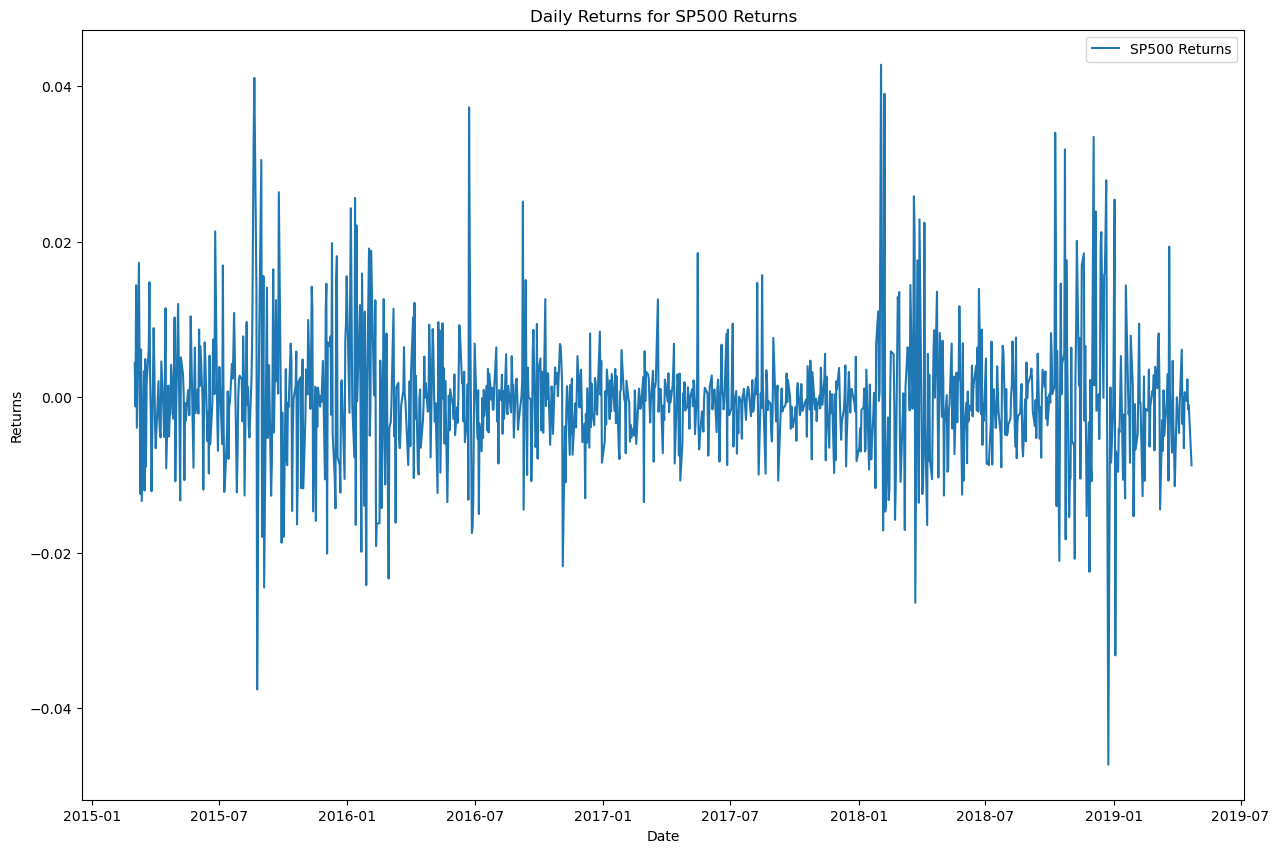

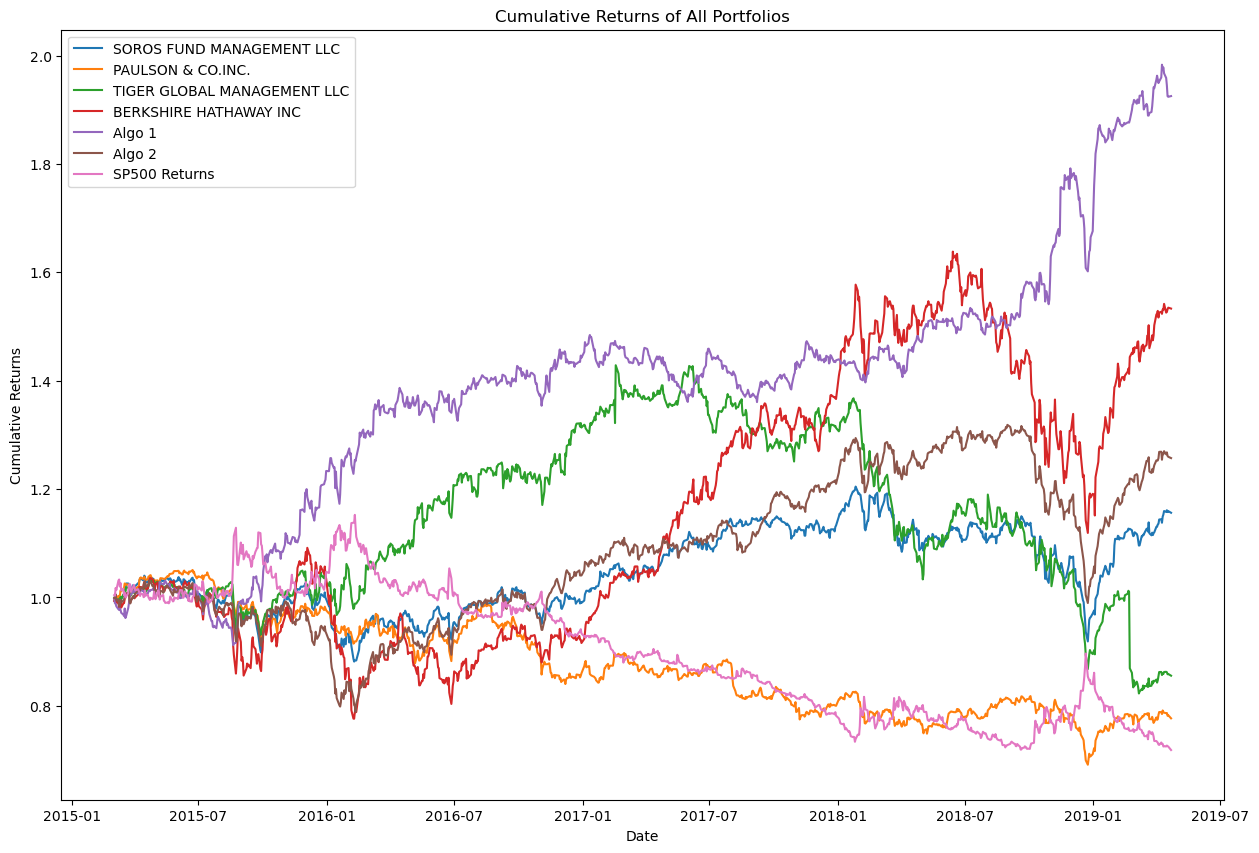

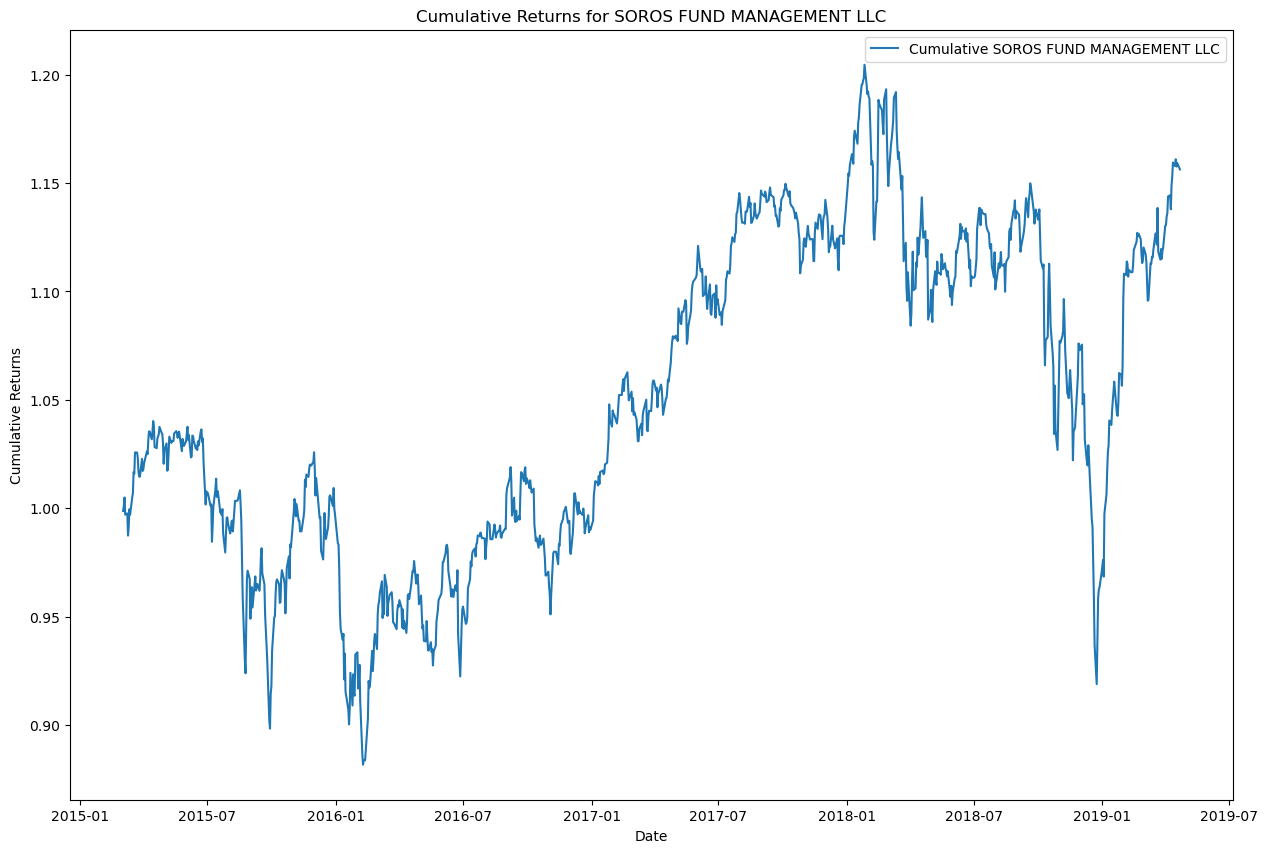

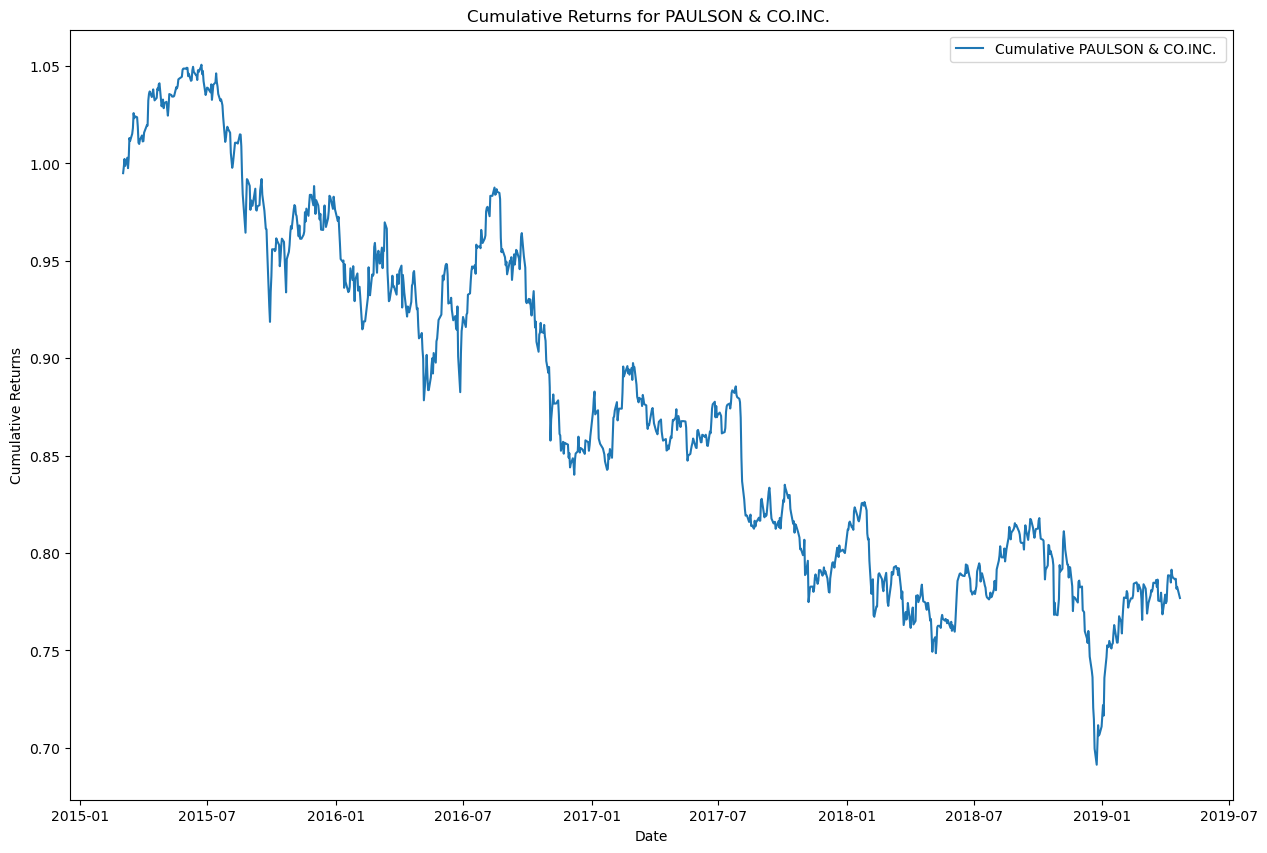

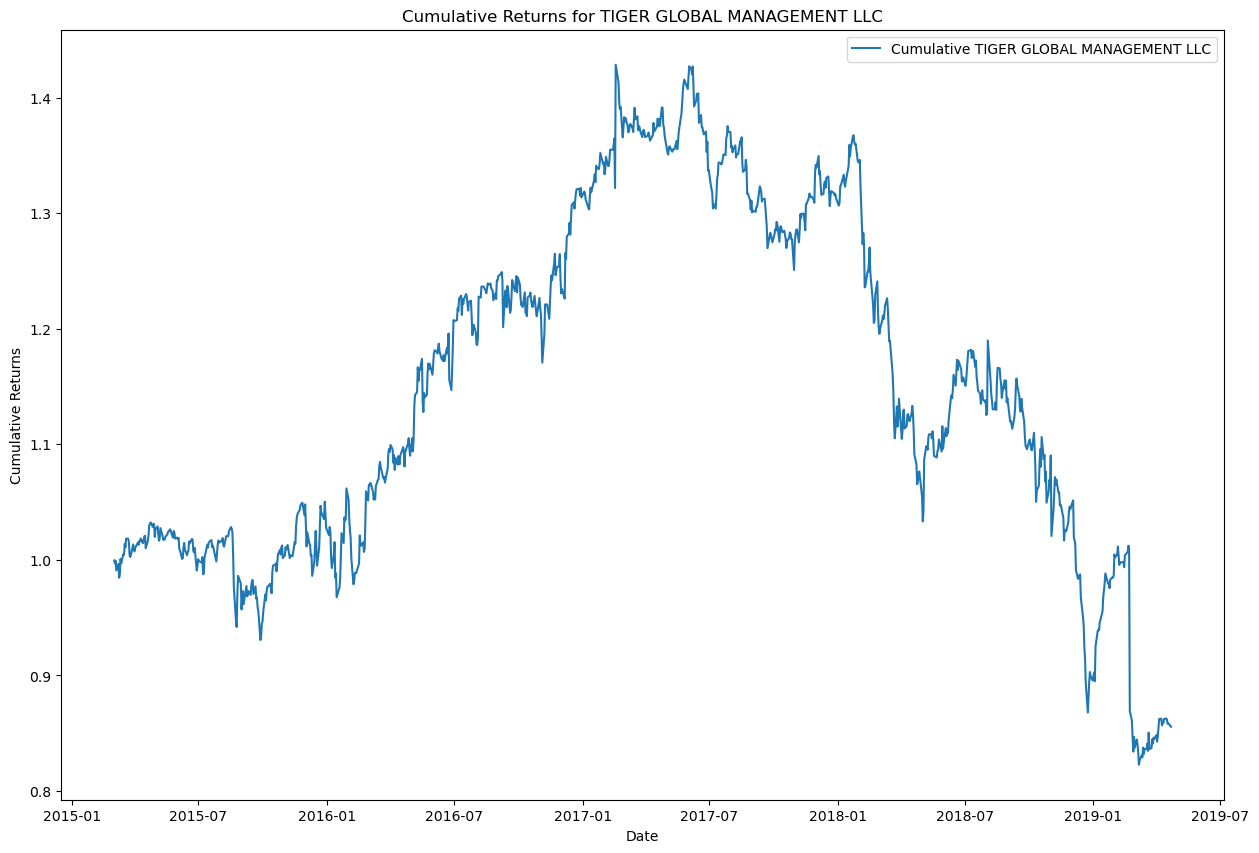

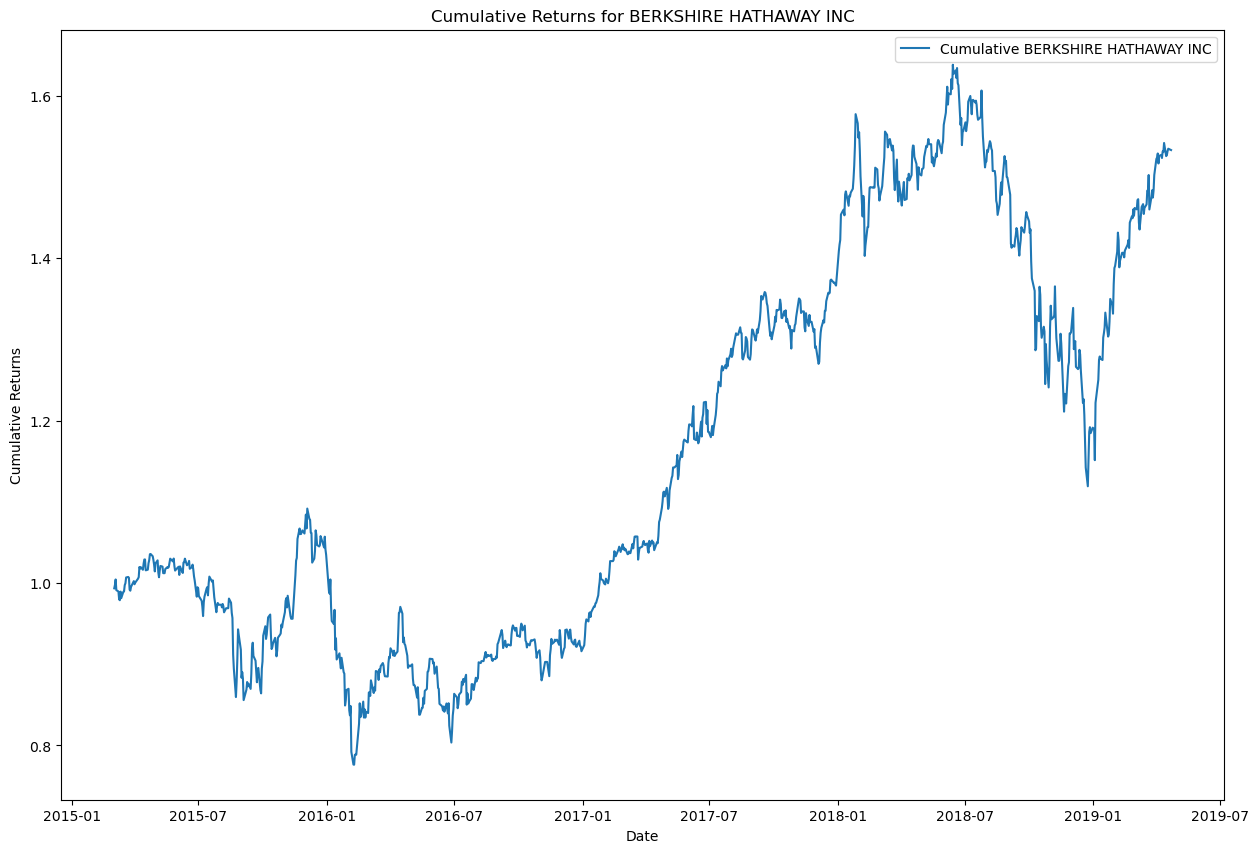

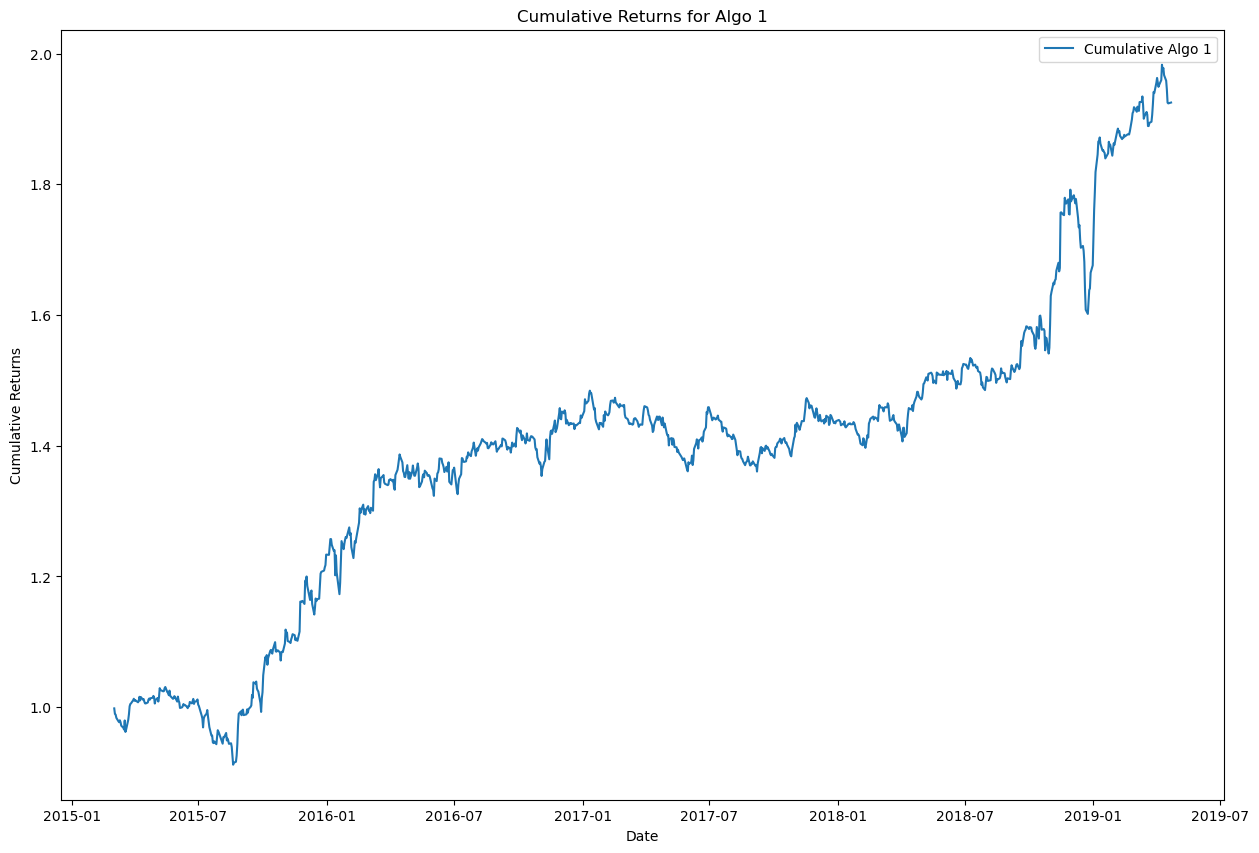

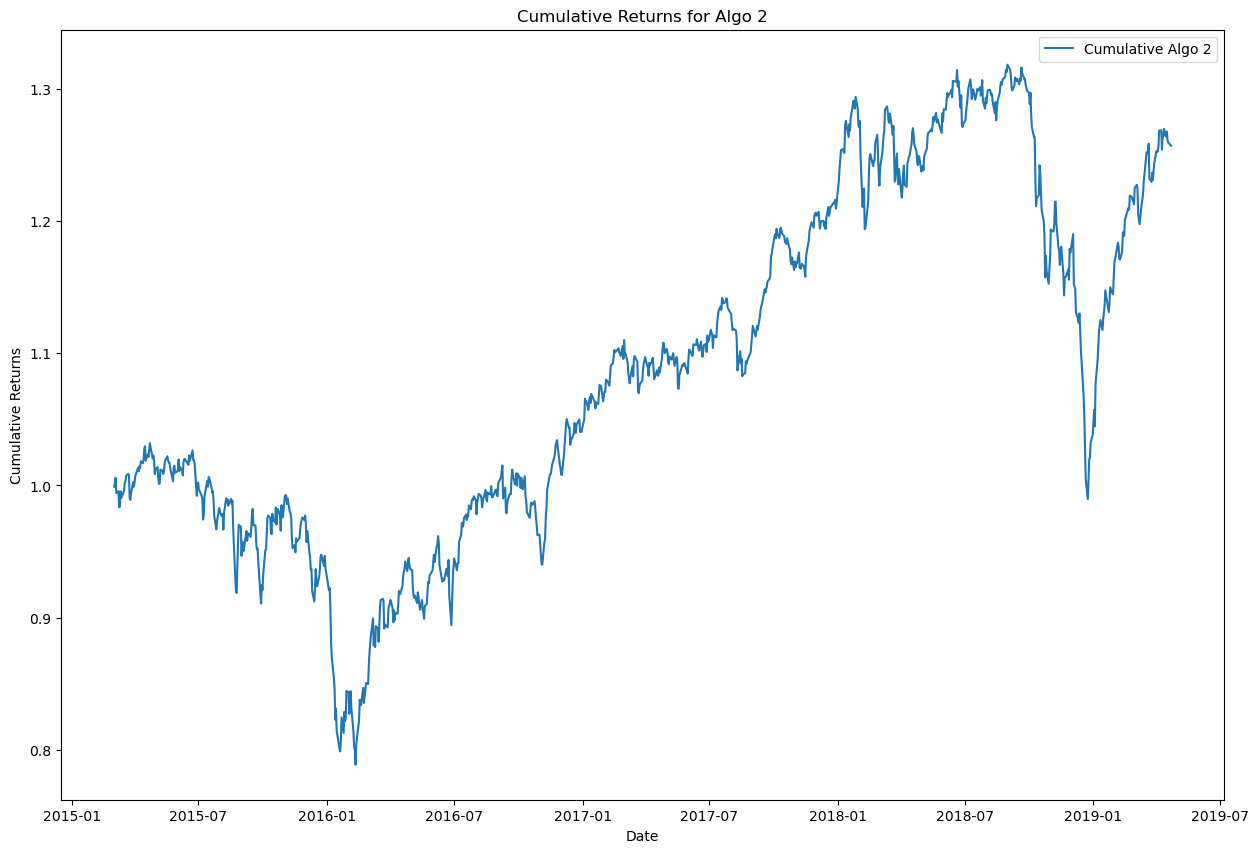

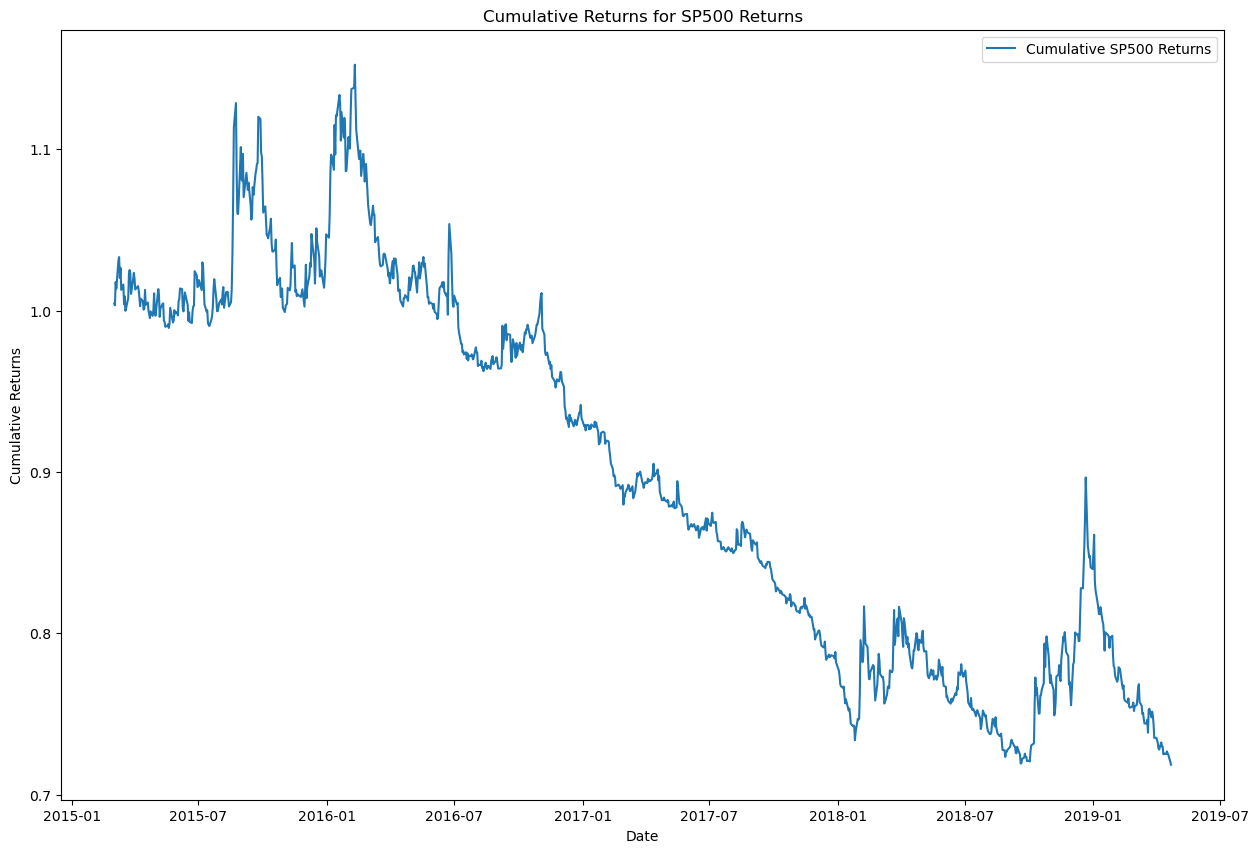

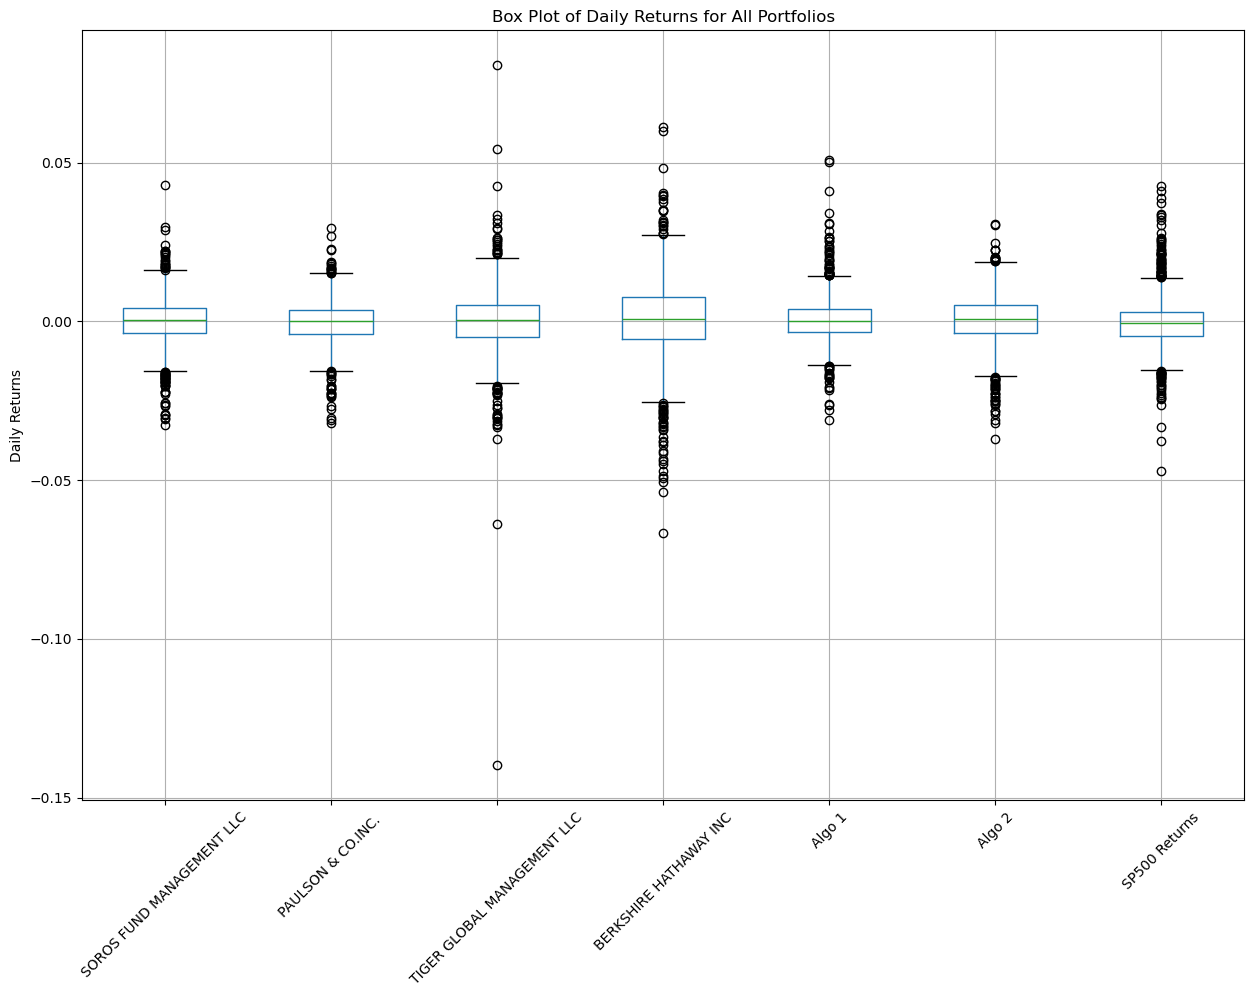

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
SP500 Returns,0.008587


,Sharpe Ratio
SOROS FUND MANAGEMENT LLC,0.34
PAULSON & CO.INC.,-0.49
TIGER GLOBAL MANAGEMENT LLC,-0.13
BERKSHIRE HATHAWAY INC,0.61
Algo 1,1.37
Algo 2,0.48
SP500 Returns,-0.52


,Annualized Std Dev
SOROS FUND MANAGEMENT LLC,0.13
PAULSON & CO.INC.,0.11
TIGER GLOBAL MANAGEMENT LLC,0.17
BERKSHIRE HATHAWAY INC,0.21
Algo 1,0.12
Algo 2,0.13
SP500 Returns,0.14


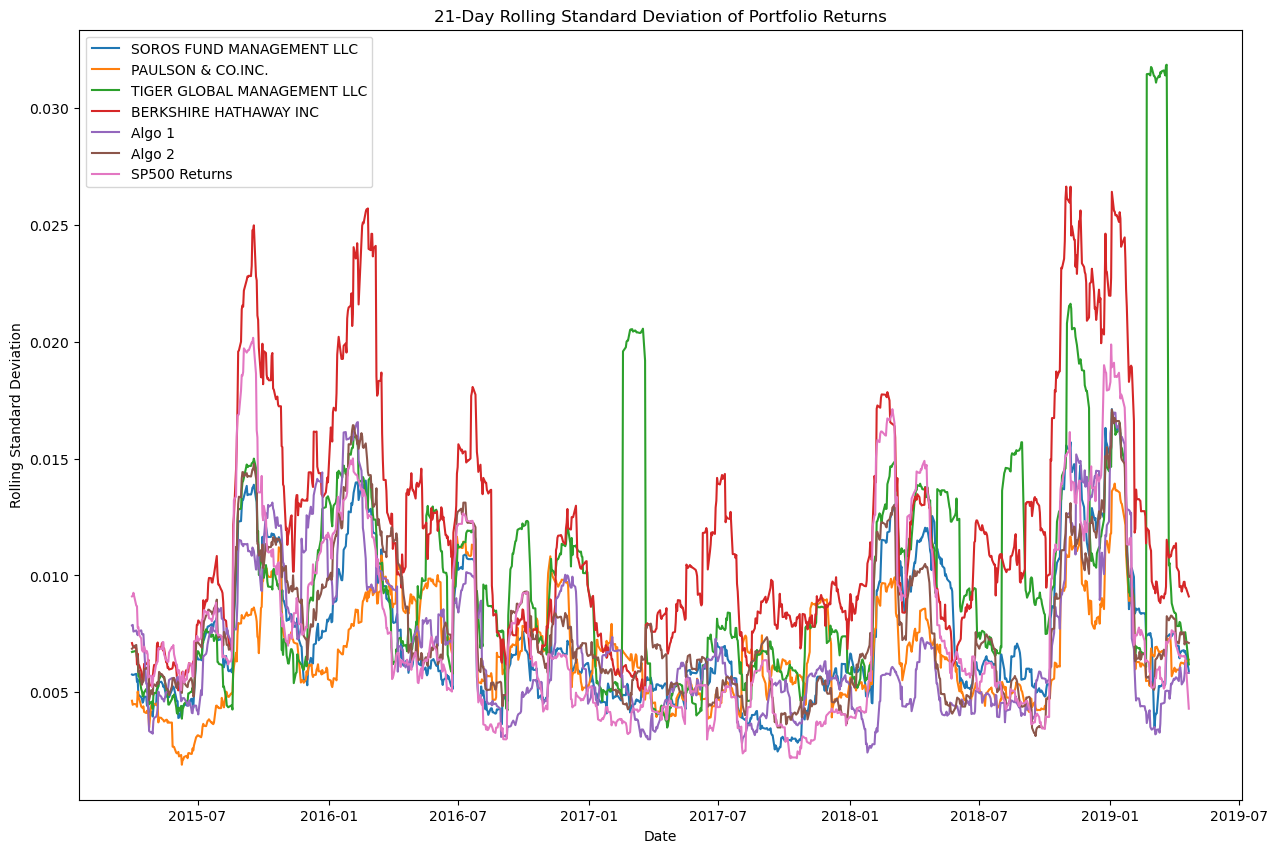

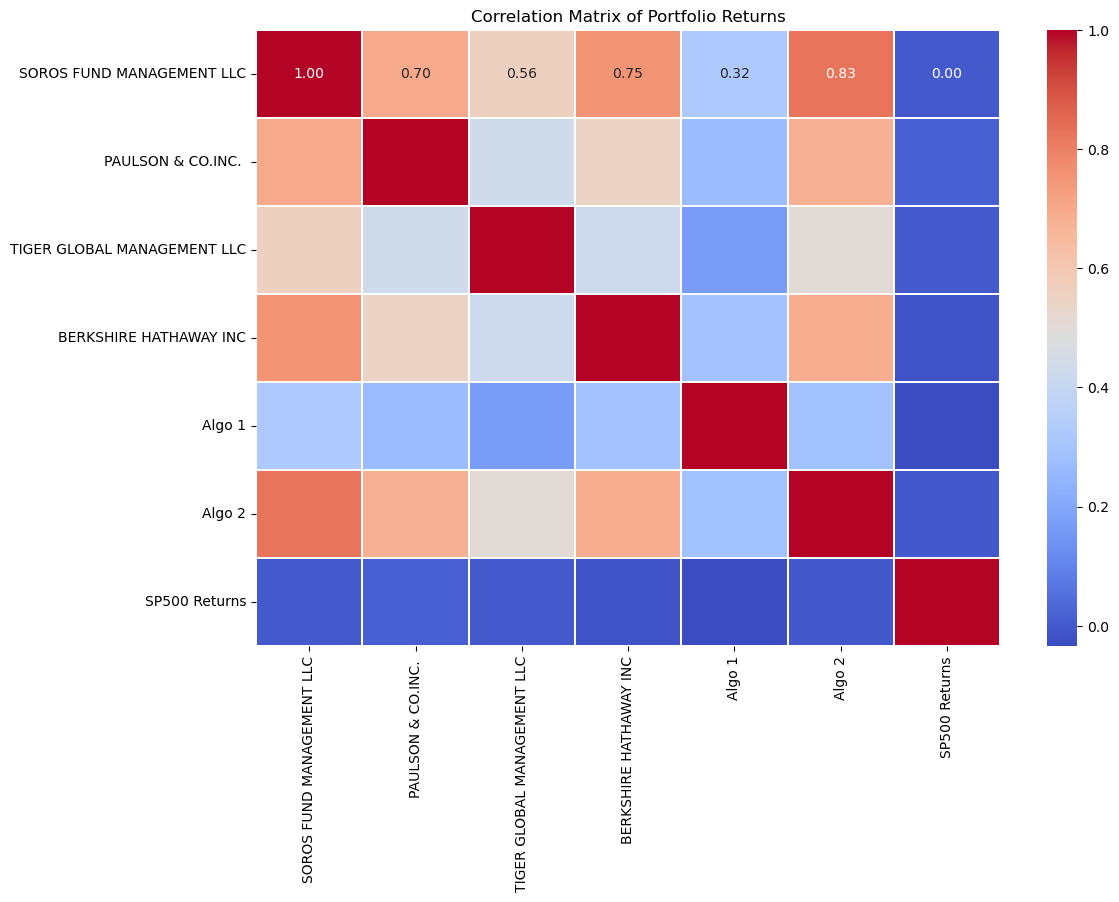

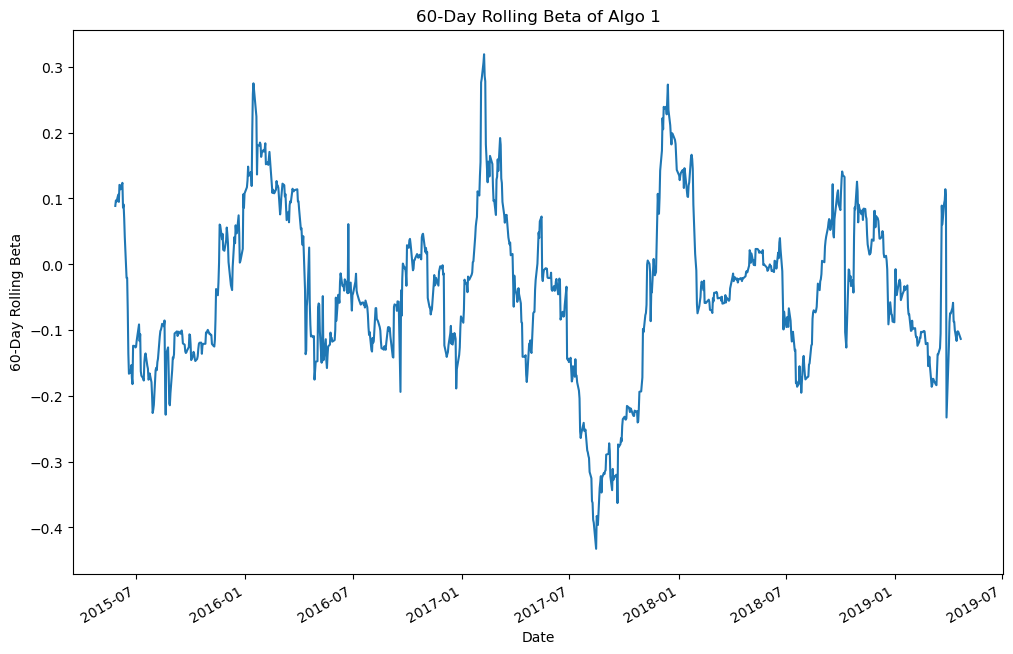

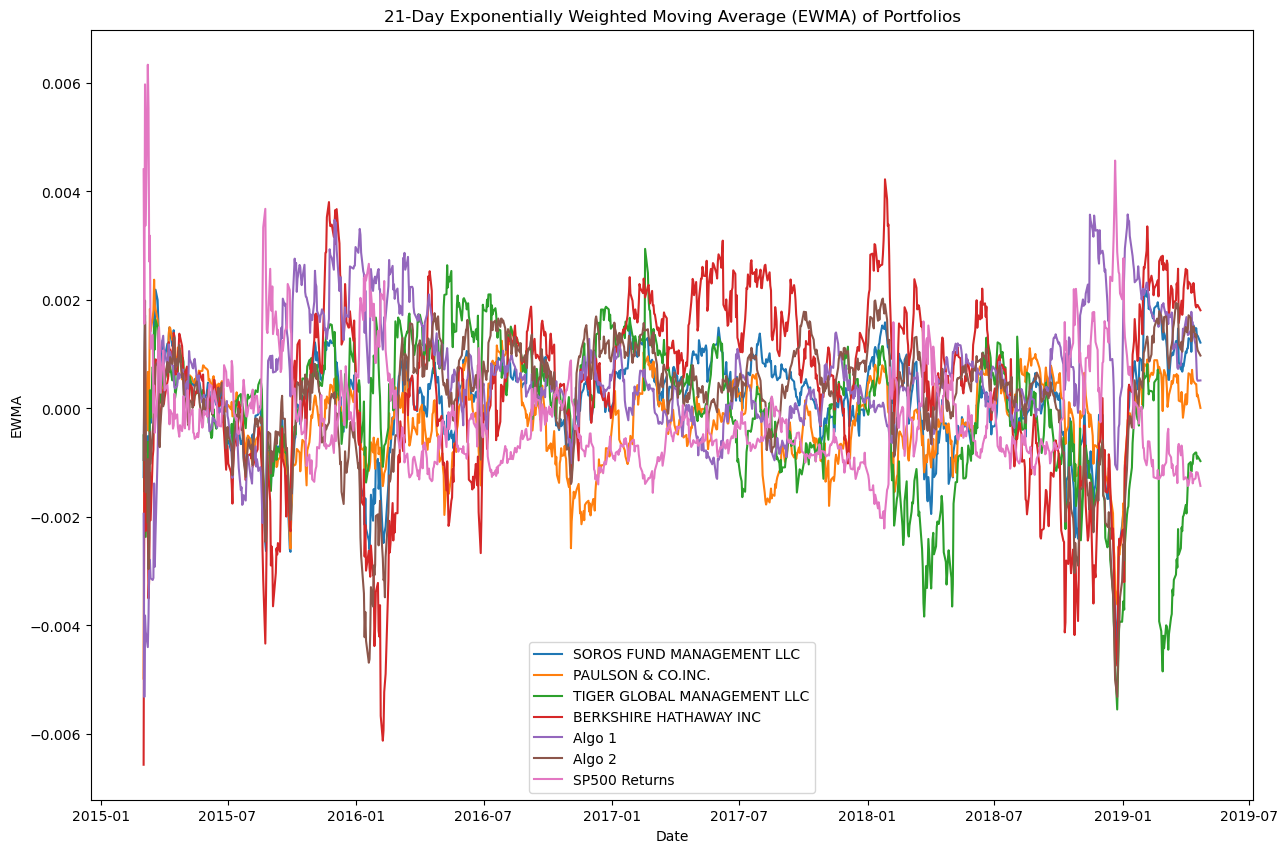

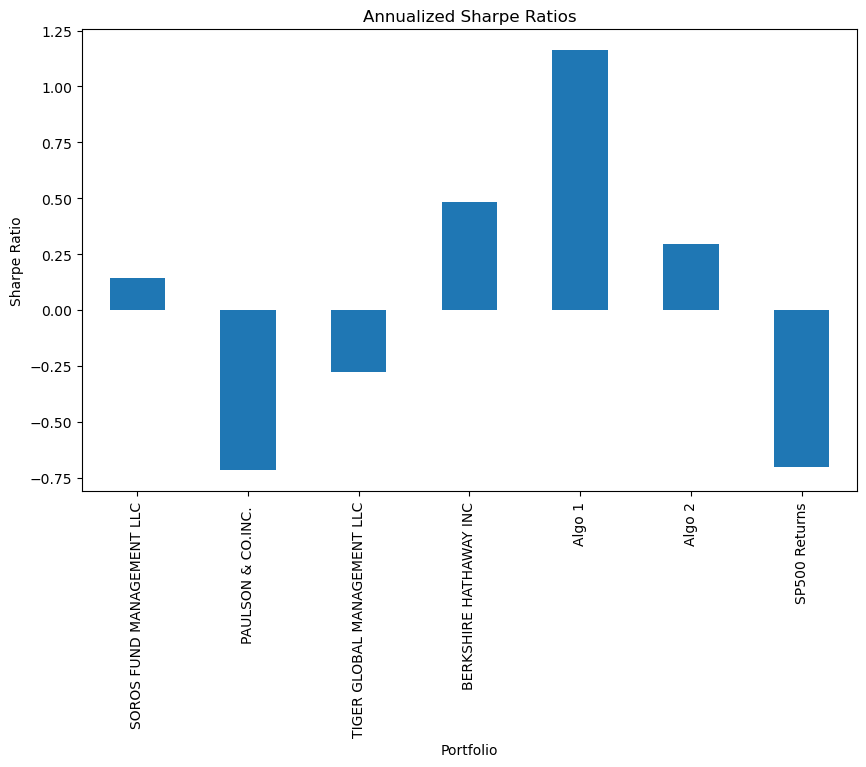

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Whale Returns data
whale_returns = pd.read_csv('Resources/whale_returns.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')
whale_returns.dropna(inplace=True)

# Read Algorithmic Returns data
algo_returns = pd.read_csv('Resources/algo_returns.csv', parse_dates=True, index_col='Date')
algo_returns.dropna(inplace=True)

# Read S&P 500 history data
sp500_history = pd.read_csv('Resources/sp500_history.csv', index_col='Date')
sp500_history.index = pd.to_datetime(sp500_history.index, format='%d-%b-%y')
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)

# Calculate S&P 500 daily returns and drop 'Close' column afterward
sp500_returns = sp500_history['Close'].pct_change().to_frame(name='SP500 Returns')
sp500_history.drop(columns=['Close'], inplace=True)

# Ensure no NaN values are present before concatenation
sp500_returns.dropna(inplace=True)

# Combine all data into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis=1)
combined_returns.sort_index(inplace=True)

# Replace infinities with NaN and then drop rows with NaN
combined_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_returns.dropna(how='any', inplace=True)

# Forward fill any remaining NaNs in combined_returns
combined_returns.ffill(inplace=True)

# No need for recalculating 'daily_returns' as 'combined_returns' are already daily returns
# Just ensure there's no infinities or NaNs
combined_returns.replace([np.inf, -np.inf], 0, inplace=True)
combined_returns.fillna(0, inplace=True)

# Calculate cumulative returns for the entire portfolio
cumulative_returns = (1 + combined_returns).cumprod()

# Check for NaN or inf values in cumulative_returns and replace them
cumulative_returns.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

# Display the first few rows of the combined DataFrame
display(combined_returns.head())

# Export the daily DataFrame to a CSV file
combined_returns.to_csv('export_main_returns.csv', index=True)
print("DataFrame exported to 'export_main_returns.csv.csv'")

# Export the combined DataFrame to a CSV file
combined_returns.to_csv('export_main_returns.csv', index=True)

plt.figure(figsize=(15,10))
for column in combined_returns.columns:
    plt.plot(combined_returns.index, combined_returns[column], label=column)

plt.title('Comparison of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plotting separate graphs for each column
for column in combined_returns.columns:
    plt.figure(figsize=(15, 10))
    plt.plot(combined_returns.index, combined_returns[column], label=column)
    plt.title(f'Daily Returns for {column}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

# Initialize the figure
plt.figure(figsize=(15, 10))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title('Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

# Adding a legend to distinguish different lines
plt.legend()

# Display the plot
plt.show()

# Plotting separate graphs for cumulative returns of each portfolio
for column in cumulative_returns.columns:
    plt.figure(figsize=(15, 10))
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=f'Cumulative {column}')
    plt.title(f'Cumulative Returns for {column}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()
    
# Creating a box plot for each column in combined_returns
plt.figure(figsize=(15, 10))
combined_returns.boxplot()

plt.title('Box Plot of Daily Returns for All Portfolios')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

# Calculate standard deviation for each portfolio
portfolio_std_dev = combined_returns.std()

# Calculate standard deviation for each portfolio
portfolio_std_dev = combined_returns.std()

# Convert the standard deviation series to a DataFrame for better presentation
portfolio_std_dev_df = portfolio_std_dev.to_frame(name='Standard Deviation')

# Format the DataFrame for a nicer display
styled_df = portfolio_std_dev_df.style.set_table_attributes("style='display:inline'").set_caption('Standard Deviation of Portfolio Returns')

display(styled_df)


# Calculate average daily returns for each portfolio
average_daily_returns = combined_returns.mean()

# Calculate standard deviation for each portfolio (daily)
portfolio_std_dev = combined_returns.std()

# Calculate Sharpe Ratio for each portfolio
# Assuming a risk-free rate of 0, for simplicity
sharpe_ratios = average_daily_returns / portfolio_std_dev * np.sqrt(252)

# Convert the Sharpe Ratio series to a DataFrame for better presentation
sharpe_ratios_df = sharpe_ratios.to_frame(name='Sharpe Ratio')

# Format the DataFrame for a nicer display
styled_sharpe_df = sharpe_ratios_df.style.set_table_attributes("style='display:inline'").set_caption('Sharpe Ratios of Portfolio Returns').format("{:.2f}")

# Display the DataFrame with enhanced formatting
display(styled_sharpe_df)


# Calculate standard deviation for each portfolio (daily)
portfolio_std_dev = combined_returns.std()

# Calculate annualized standard deviation for each portfolio
annualized_std_dev = portfolio_std_dev * np.sqrt(252)

# Convert the annualized standard deviation series to a DataFrame for better presentation
annualized_std_dev_df = annualized_std_dev.to_frame(name='Annualized Std Dev')

# Format the DataFrame for a nicer display
styled_annualized_std_dev_df = annualized_std_dev_df.style.set_table_attributes("style='display:inline'").set_caption('Annualized Standard Deviation of Portfolio Returns').format("{:.2f}")

# Display the DataFrame with enhanced formatting
display(styled_annualized_std_dev_df)


# Calculate the rolling standard deviation for each portfolio using a 21-day window
rolling_std_dev = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(15, 10))
for column in rolling_std_dev.columns:
    plt.plot(rolling_std_dev.index, rolling_std_dev[column], label=column)

plt.title('21-Day Rolling Standard Deviation of Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.show()


# Calculate the correlation matrix
correlation_matrix = combined_returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Portfolio Returns')
plt.show()


# Calculate 60-day rolling covariance of Algo 1 returns vs. S&P 500 returns
rolling_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['SP500 Returns'])

# Calculate 60-day rolling variance of S&P 500 returns
rolling_variance = combined_returns['SP500 Returns'].rolling(window=60).var()

# Calculate the 60-day rolling beta of Algo 1
rolling_beta = rolling_covariance / rolling_variance

# Plot the rolling beta
plt.figure(figsize=(12, 8))
rolling_beta.plot(title='60-Day Rolling Beta of Algo 1')
plt.xlabel('Date')
plt.ylabel('60-Day Rolling Beta')
plt.show()


# Calculate the EWMA with a 21-day half-life for each portfolio
ewm_21 = combined_returns.ewm(halflife=21).mean()

# Plotting the EWMA for each portfolio including S&P 500
plt.figure(figsize=(15, 10))
for column in ewm_21.columns:
    plt.plot(ewm_21.index, ewm_21[column], label=column)

plt.title('21-Day Exponentially Weighted Moving Average (EWMA) of Portfolios')
plt.xlabel('Date')
plt.ylabel('EWMA')
plt.legend()
plt.show()



# Risk-free rate
risk_free_rate = .0001

# Calculate daily excess returns
excess_returns = combined_returns - risk_free_rate

# Calculate annualized Sharpe ratios (assuming 252 trading days)
sharpe_ratios = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

# Visualize Sharpe ratios in a bar plot
sharpe_ratios.plot(kind='bar', figsize=(10, 6), title='Annualized Sharpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()

